# Retail customer segmentation
The aim of this project is to conduct customer segmentation using a clustering algorithm. This will involve dividing a diverse customer base into smaller, homogeneous groups based on shared characteristics like demographics, behavior, or preferences. This strategy is invaluable as it enables businesses to tailor their marketing efforts, products, and services to each segment's specific needs and preferences. By doing so, companies can enhance customer satisfaction, loyalty, and profitability. Moreover, it allows for more efficient resource allocation, helping businesses focus their resources where they are most likely to yield the highest returns. Overall, customer segmentation empowers businesses to create more personalized and targeted experiences, ultimately driving better results and a competitive edge in the market.

# Scope

The dataset has been downloaded from [Kaggle](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering) The data contains customer information collected from a mall's membership cards.

## About the data

The features can be divided into the following four themes:

1. *People:*
* ***ID (nominal):*** Customer's unique identifier
* ***Year_birth (date):*** Birth year
* ***Education (nominal):*** Education level
* ***Marital_Status (nominal):*** Marital status
* ***Income (numerical):*** Annual household income
* ***Kidhome (numerical):*** No. of children in the household
* ***Teenhome (numerical):*** No. of teens in the household
* ***Dt_Customer (date):*** Date of customer's enrolment
* ***Recency (numerical):*** No. of days since last purchase
* ***Complain (nominal/boolean):*** Complained in the last 2 years (1/0 = yes/no)

2. *Products:*
* ***MntWines (numerical):*** Expenditure on wine in last 2 years
* ***MntFruits (numerical):*** Expenditure on fruits in the last 2 years
* ***MntMeatProducts (numerical):*** Expenditure on meat in the last 2 years
* ***MntFishProducts (numerical):*** Expenditure on fish in the last 2 years
* ***MntSweetProducts (numerical):*** Expenditure on sweets in the last 2 years
* ***MntGoldProds (numerical):*** Expenditure on gold in the last 2 years

3. *Promotion:*
* ***NumDealsPurchases (numerical):*** No. of purchases made with a discount
* ***AcceptedCmp1 (nominal/boolean):*** Accepted offer in the 1st campaign (1/0 = yes/no)
* ***AcceptedCmp2 (nominal/boolean):*** Accepted offer in the 2nd campaign (1/0 = yes/no)
* ***AcceptedCmp3 (nominal/boolean):*** Accepted offer in the 3rd campaign (1/0 = yes/no)
* ***AcceptedCmp4 (nominal/boolean):*** Accepted offer in the 4th campaign (1/0 = yes/no)
* ***AcceptedCmp5 (nominal/boolean):*** Accepted offer in the 5th campaign (1/0 = yes/no)
* ***Response (nominal/boolean):*** Accepted offer in the last campaign (1/0 = yes/no)

4. *Place:*
* ***NumWebPurchases (numerical):*** No. of purchases via website
* ***NumCataloguePurchases (numerical):*** No. of purchases via catalogue
* ***NumStorePurchases (numerical):*** No. of purchases in store
* ***NumWebVisitsMonth (numerical):*** No. of visits to website in the last month

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\retail-customer-segmentation\\retail-customer-segmentation'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import ast
import config
import datetime
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
import warnings
plt.style.use('seaborn-v0_8-muted')

## Import data

In [10]:
eng_df = pd.read_csv(config.file_directory('cleaned') + 'engineered_df.csv')
print(f"Number of records: {eng_df.shape[0]}")
eng_df.head(3)

Number of records: 2212


,is_parent,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,...,AcceptedCmp1,AcceptedCmp5,Age_qt,Income_qt,NumDealsPurchases_qt,NumWebPurchases_qt,NumCatalogPurchases_qt,NumStorePurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0.851675,0.242511,0.648724,1.295363,2.033104,-0.258792,0.571638,1.404533
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1.125776,-0.182994,0.161281,-1.280981,-0.330873,-1.566990,-0.214920,-1.479004
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0.344154,0.833817,-0.720087,1.295363,0.109365,1.042247,-0.514923,0.370695


In [15]:
clean_df = pd.read_csv(config.file_directory('cleaned') + 'cleaned_df.csv')
print(f"Number of records: {clean_df.shape[0]}")
clean_df.head(3)

Number of records: 2212


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,int_dt_Customer,total_spend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,False,False,False,False,False,False,True,64,1346716800000000000,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,False,False,False,False,False,False,False,67,1394236800000000000,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,False,False,False,False,False,False,False,56,1377043200000000000,776


## Model selection 

### K-means

#### Optimisation

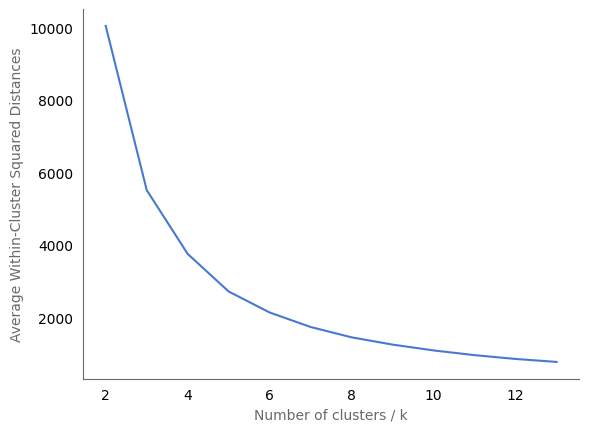

In [83]:
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=300).fit(eng_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})

fig, axes = plt.subplots()
axes.plot(inertias['n_clusters'], inertias['inertia'])
axes.set_xlabel('Number of clusters / k', color='dimgray')
axes.set_ylabel('Average Within-Cluster Squared Distances', color='dimgray')

axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

#### Interpretation

##### Visual check of clusters

In [84]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=list(eng_df.columns))
centers.head()

,is_parent,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,...,AcceptedCmp1,AcceptedCmp5,Age_qt,Income_qt,NumDealsPurchases_qt,NumWebPurchases_qt,NumCatalogPurchases_qt,NumStorePurchases_qt,NumWebVisitsMonth_qt,total_spend_qt
0,0.325967,1.657459e-02,0.436464,0.314917,0.232044,0.099448,0.298343,-2.168404e-18,0.149171,0.392265,...,-1.387779e-17,4.163336e-17,0.832637,-0.319383,0.135632,-0.448532,-0.192712,-0.350486,-0.179808,-0.360858
1,0.053004,9.187279e-02,0.537102,0.272085,0.098940,0.077739,0.469965,3.533569e-03,0.208481,0.236749,...,0.000000e+00,4.163336e-17,-0.951603,-1.132430,-0.274453,-0.756199,-5.199338,-0.855940,0.800158,-1.035673
2,0.068100,0.000000e+00,0.476703,0.215054,0.308244,0.182796,0.354839,-8.673617e-19,0.146953,0.265233,...,5.017921e-02,2.867384e-02,0.614692,0.435466,0.708419,1.180378,0.661555,0.758394,0.175316,0.662290
3,0.005102,3.469447e-18,0.561224,0.219388,0.219388,0.045918,0.341837,5.102041e-03,0.316327,0.290816,...,2.551020e-01,3.469388e-01,-1.095739,1.228919,-0.641155,0.460870,1.084278,0.708228,-1.009233,1.336272
4,0.535156,2.343750e-02,0.445312,0.253906,0.277344,0.128906,0.339844,-1.301043e-18,0.218750,0.277344,...,-1.387779e-17,4.163336e-17,0.371617,-0.609416,-0.216575,-0.896227,-5.199338,-0.857500,0.336087,-1.153906


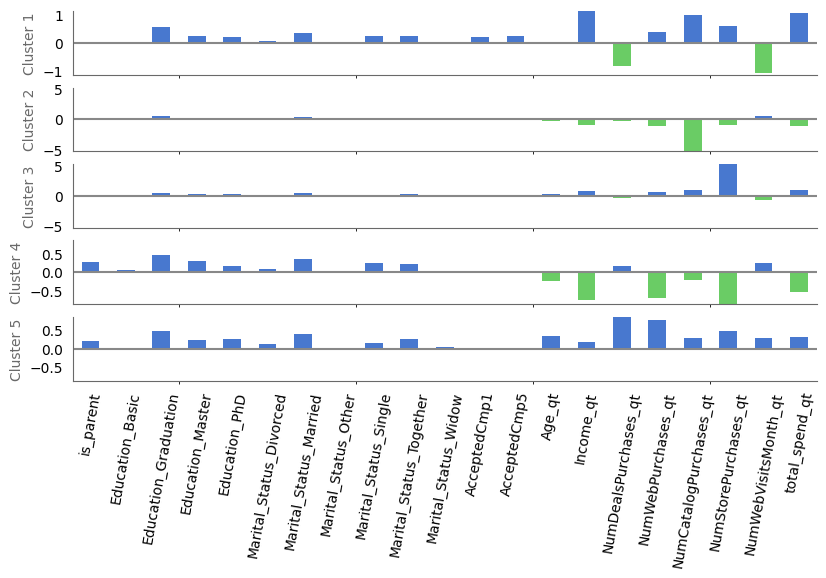

In [82]:
fig, axes = plt.subplots(5, 1, figsize=(6.4*1.5, 4.8), sharex=True)
for i, ax in enumerate(axes):
    center =centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i +1}', color='dimgray')
    ax.set_ylim(-maxPC, maxPC)

for ax in axes:
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

xtick_labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels, rotation=80);

##### Cluster cardinality

In [35]:
from collections import Counter
kmeans = KMeans(n_clusters=5, random_state=0, init='random', n_init=300).fit(eng_df)
clean_df['cluster'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({4: 653, 1: 575, 0: 536, 3: 365, 2: 83})

##### Cluster magnitude

##### Cluster magnitude versus cardinality

##### Similarity measure

### Hierarchical clustering

#### Optimisation

#### Interpretation

# Conclusion